In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
from IPython.display import display
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

# **Dataset Description**

## 1. **House Price Data (CSUSHPISA.csv)**
## Description: This dataset typically represents the House Price Index (HPI), which is a measure of the price change of residential properties. The Case-Shiller Home Price Index is often used to track the change in home prices in the U.S. over time. It is an essential factor in analyzing housing market trends.

## 2. **Interest Rate Data (Federal Funds Effective Rate.csv)**
## Description: This dataset likely contains the Federal Funds Effective Rate (FFR), which is the interest rate at which depository institutions lend reserve balances to other depository institutions overnight. It's a key economic indicator used by the Federal Reserve to influence economic activity, including housing.

## 3. **Delinquency Rate Data (Mortgage Average in the United States.csv)**
## Description: This dataset tracks mortgage delinquency rates in the U.S. It shows the percentage of mortgages that are past due and not being paid on time. High delinquency rates often signal stress in the housing market and the broader economy.

## 4. **Housing Units Data (New Privately-Owned Housing Units Started: Total Units.csv)**
## Description: This dataset likely covers housing starts, specifically the number of new privately-owned housing units that have been started in the U.S. This indicator provides insight into the health of the housing market and construction industry.

## 5. **Population Growth Data (Population Growth.csv)**
## Description: This dataset likely shows the population growth rate in the U.S. Population growth is a key driver of housing demand, as more people require more homes.

## 6. **Income Data (Real Median Household Income in the United States.csv)**
## Description: This dataset likely covers real median household income in the U.S. It shows the income earned by a typical household adjusted for inflation. Higher income levels generally lead to higher affordability for housing.

## 7. **Inflation Data (US Inflation Dataset (1947 - 2023) export 2025-01-08 10-07-28.csv)**
## escription: This dataset contains U.S. inflation data, tracking changes in the price level of goods and services over time. Inflation erodes purchasing power and can affect housing affordability.

## 8. **Unemployment Data (Unemployment Rate.csv)**
## Description: This dataset likely tracks the unemployment rate in the U.S., a key indicator of the health of the labor market. High unemployment can reduce demand for housing due to lower consumer purchasing power.

In [4]:
# These datasets are sourced from public websites.

# Load datasets
house_price = pd.read_csv('/content/drive/MyDrive/HomeLLC/data/CSUSHPISA.csv')
interest_rate = pd.read_csv('/content/drive/MyDrive/HomeLLC/data/Federal Funds Effective Rate.csv')
delinquency_rate = pd.read_csv('/content/drive/MyDrive/HomeLLC/data/Mortgage Average in the United States.csv')
housing_units = pd.read_csv('/content/drive/MyDrive/HomeLLC/data/New Privately-Owned Housing Units Started: Total Units.csv')
population_growth = pd.read_csv('/content/drive/MyDrive/HomeLLC/data/Population Growth.csv')
income = pd.read_csv('/content/drive/MyDrive/HomeLLC/data/Real Median Household Income in the United States.csv')
inflation = pd.read_csv('/content/drive/MyDrive/HomeLLC/data/US Inflation Dataset (1947 - 2023) export 2025-01-08 10-07-28.csv')
unemployment = pd.read_csv('/content/drive/MyDrive/HomeLLC/data/Unemployment Rate.csv')


In [5]:
datasets = {
    'House Price Data': house_price,
    'Interest Rate Data': interest_rate,
    'Delinquency Rate Data': delinquency_rate,
    'Housing Units Data': housing_units,
    'Population Growth Data': population_growth,
    'Income Data': income,
    'Inflation Data': inflation,
    'Unemployment Data': unemployment
}


def display_data_summary(datasets):
    for name, df in datasets.items():
        print(f"--- {name} ---")
        print("First 5 rows:")
        display(df.head())
        print("\nBasic Information:")
        print(df.info())
        print("\nSummary Statistics:")
        print(df.describe())
        print("\n" + "-"*50 + "\n")

display_data_summary(datasets)

--- House Price Data ---
First 5 rows:


,observation_date,CSUSHPISA
0,1987-01-01,63.963
1,1987-02-01,64.422
2,1987-03-01,64.734
3,1987-04-01,65.130
4,1987-05-01,65.562



Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   observation_date  454 non-null    object 
 1   CSUSHPISA         454 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.2+ KB
None

Summary Statistics:
        CSUSHPISA
count  454.000000
mean   146.974220
std     67.157676
min     63.963000
25%     82.796000
50%    142.402000
75%    182.198250
max    324.458000

--------------------------------------------------

--- Interest Rate Data ---
First 5 rows:


,observation_date,DFF
0,1954-07-01,1.13
1,1954-07-02,1.25
2,1954-07-03,1.25
3,1954-07-04,1.25
4,1954-07-05,0.88



Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25758 entries, 0 to 25757
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   observation_date  25758 non-null  object 
 1   DFF               25758 non-null  float64
dtypes: float64(1), object(1)
memory usage: 402.6+ KB
None

Summary Statistics:
                DFF
count  25758.000000
mean       4.609442
std        3.583744
min        0.040000
25%        1.830000
50%        4.310000
75%        6.200000
max       22.360000

--------------------------------------------------

--- Delinquency Rate Data ---
First 5 rows:


,observation_date,MORTGAGE30US
0,1971-04-02,7.33
1,1971-04-09,7.31
2,1971-04-16,7.31
3,1971-04-23,7.31
4,1971-04-30,7.29



Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2806 entries, 0 to 2805
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   observation_date  2806 non-null   object 
 1   MORTGAGE30US      2806 non-null   float64
dtypes: float64(1), object(1)
memory usage: 44.0+ KB
None

Summary Statistics:
       MORTGAGE30US
count   2806.000000
mean       7.718100
std        3.221758
min        2.650000
25%        5.252500
50%        7.350000
75%        9.357500
max       18.630000

--------------------------------------------------

--- Housing Units Data ---
First 5 rows:


,observation_date,HOUST
0,1959-01-01,1657
1,1959-02-01,1667
2,1959-03-01,1620
3,1959-04-01,1590
4,1959-05-01,1498



Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 791 entries, 0 to 790
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   observation_date  791 non-null    object
 1   HOUST             791 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 12.5+ KB
None

Summary Statistics:
             HOUST
count   791.000000
mean   1432.093552
std     380.038284
min     478.000000
25%    1209.000000
50%    1455.000000
75%    1647.500000
max    2494.000000

--------------------------------------------------

--- Population Growth Data ---
First 5 rows:


,observation_date,SPPOPGROWUSA
0,1961-01-01,1.657730
1,1962-01-01,1.537997
2,1963-01-01,1.439165
3,1964-01-01,1.389046
4,1965-01-01,1.250172



Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   observation_date  63 non-null     object 
 1   SPPOPGROWUSA      63 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.1+ KB
None

Summary Statistics:
       SPPOPGROWUSA
count     63.000000
mean       0.979681
std        0.269504
min        0.157343
25%        0.881390
50%        0.959590
75%        1.151617
max        1.657730

--------------------------------------------------

--- Income Data ---
First 5 rows:


,observation_date,MEHOINUSA672N
0,1984-01-01,58930
1,1985-01-01,60050
2,1986-01-01,62280
3,1987-01-01,63060
4,1988-01-01,63530



Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   observation_date  40 non-null     object
 1   MEHOINUSA672N     40 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 768.0+ bytes
None

Summary Statistics:
       MEHOINUSA672N
count      40.000000
mean    68362.000000
std      5805.590233
min     58930.000000
25%     63815.000000
50%     68280.000000
75%     70407.500000
max     81210.000000

--------------------------------------------------

--- Inflation Data ---
First 5 rows:


,date,value
0,1947-01-01 00:00:00.000,21.48
1,1947-02-01 00:00:00.000,21.62
2,1947-03-01 00:00:00.000,22.00
3,1947-04-01 00:00:00.000,22.00
4,1947-05-01 00:00:00.000,21.95



Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    918 non-null    object 
 1   value   918 non-null    float64
dtypes: float64(1), object(1)
memory usage: 14.5+ KB
None

Summary Statistics:
            value
count  918.000000
mean   117.794828
std     83.736360
min     21.480000
25%     32.105000
50%    106.900000
75%    188.000000
max    303.841000

--------------------------------------------------

--- Unemployment Data ---
First 5 rows:


,observation_date,UNRATE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5



Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   observation_date  923 non-null    object 
 1   UNRATE            923 non-null    float64
dtypes: float64(1), object(1)
memory usage: 14.5+ KB
None

Summary Statistics:
           UNRATE
count  923.000000
mean     5.684724
std      1.709415
min      2.500000
25%      4.400000
50%      5.500000
75%      6.700000
max     14.800000

--------------------------------------------------



# Data Preprocessing

In [6]:
# Convert observation_date to period (year-month)
house_price['observation_date'] = pd.to_datetime(house_price['observation_date']).dt.to_period('M')
interest_rate['observation_date'] = pd.to_datetime(interest_rate['observation_date']).dt.to_period('M')
delinquency_rate['observation_date'] = pd.to_datetime(delinquency_rate['observation_date']).dt.to_period('M')
housing_units['observation_date'] = pd.to_datetime(housing_units['observation_date']).dt.to_period('M')
population_growth['observation_date'] = pd.to_datetime(population_growth['observation_date']).dt.to_period('M')
income['observation_date'] = pd.to_datetime(income['observation_date']).dt.to_period('M')
inflation['date'] = pd.to_datetime(inflation['date']).dt.to_period('M')
unemployment['observation_date'] = pd.to_datetime(unemployment['observation_date']).dt.to_period('M')

# Now, aggregate data by 'observation_date' and compute the mean for the other columns
house_price = house_price.groupby('observation_date').agg('mean').reset_index()
interest_rate = interest_rate.groupby('observation_date').agg('mean').reset_index()
delinquency_rate = delinquency_rate.groupby('observation_date').agg('mean').reset_index()
housing_units = housing_units.groupby('observation_date').agg('mean').reset_index()
population_growth = population_growth.groupby('observation_date').agg('mean').reset_index()
income = income.groupby('observation_date').agg('mean').reset_index()
inflation = inflation.groupby('date').agg('mean').reset_index()
unemployment = unemployment.groupby('observation_date').agg('mean').reset_index()



In [7]:
# Rename columns for each dataset as needed

# House Price dataset
house_price = house_price.rename(columns={
    'CSUSHPISA': 'house_price_index',
})

# Interest Rate dataset
interest_rate = interest_rate.rename(columns={
    'DFF': 'Federal_Funds_Effective_Rate',
})

# Delinquency Rate dataset
delinquency_rate = delinquency_rate.rename(columns={
    'MORTGAGE30US': 'Mortgage',
})

# Housing Units dataset
housing_units = housing_units.rename(columns={
    'HOUST': 'housing_units',
})

# Population Growth dataset
population_growth = population_growth.rename(columns={
    'SPPOPGROWUSA': 'population_growth',
})

# Income dataset
income = income.rename(columns={
    'MEHOINUSA672N': 'income',
})

# Inflation dataset
inflation = inflation.rename(columns={
    'value': 'inflation',
})

# Unemployment dataset
unemployment = unemployment.rename(columns={
    'UNRATE': 'unemployment_rate',
})


In [8]:
datasets = {
    'House Price Data': house_price,
    'Interest Rate Data': interest_rate,
    'Delinquency Rate Data': delinquency_rate,
    'Housing Units Data': housing_units,
    'Population Growth Data': population_growth,
    'Income Data': income,
    'Inflation Data': inflation,
    'Unemployment Data': unemployment
}


def display_data_summary(datasets):
    for name, df in datasets.items():
        print(f"--- {name} ---")
        print("First 5 rows:")
        display(df.head())
        print("\nBasic Information:")
        print(df.info())
        print("\nSummary Statistics:")
        print(df.describe())
        print("\n" + "-"*50 + "\n")

display_data_summary(datasets)

--- House Price Data ---
First 5 rows:


,observation_date,house_price_index
0,1987-01,63.963
1,1987-02,64.422
2,1987-03,64.734
3,1987-04,65.130
4,1987-05,65.562



Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype    
---  ------             --------------  -----    
 0   observation_date   454 non-null    period[M]
 1   house_price_index  454 non-null    float64  
dtypes: float64(1), period[M](1)
memory usage: 7.2 KB
None

Summary Statistics:
       house_price_index
count         454.000000
mean          146.974220
std            67.157676
min            63.963000
25%            82.796000
50%           142.402000
75%           182.198250
max           324.458000

--------------------------------------------------

--- Interest Rate Data ---
First 5 rows:


,observation_date,Federal_Funds_Effective_Rate
0,1954-07,0.799355
1,1954-08,1.220645
2,1954-09,1.066667
3,1954-10,0.848710
4,1954-11,0.833667



Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype    
---  ------                        --------------  -----    
 0   observation_date              847 non-null    period[M]
 1   Federal_Funds_Effective_Rate  847 non-null    float64  
dtypes: float64(1), period[M](1)
memory usage: 13.4 KB
None

Summary Statistics:
       Federal_Funds_Effective_Rate
count                    847.000000
mean                       4.608816
std                        3.565454
min                        0.049000
25%                        1.824672
50%                        4.285161
75%                        6.154489
max                       19.099667

--------------------------------------------------

--- Delinquency Rate Data ---
First 5 rows:


,observation_date,Mortgage
0,1971-04,7.3100
1,1971-05,7.4250
2,1971-06,7.5300
3,1971-07,7.6040
4,1971-08,7.6975



Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 646 entries, 0 to 645
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype    
---  ------            --------------  -----    
 0   observation_date  646 non-null    period[M]
 1   Mortgage          646 non-null    float64  
dtypes: float64(1), period[M](1)
memory usage: 10.2 KB
None

Summary Statistics:
         Mortgage
count  646.000000
mean     7.716446
std      3.220160
min      2.684000
25%      5.244000
50%      7.372250
75%      9.343750
max     18.454000

--------------------------------------------------

--- Housing Units Data ---
First 5 rows:


,observation_date,housing_units
0,1959-01,1657.0
1,1959-02,1667.0
2,1959-03,1620.0
3,1959-04,1590.0
4,1959-05,1498.0



Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 791 entries, 0 to 790
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype    
---  ------            --------------  -----    
 0   observation_date  791 non-null    period[M]
 1   housing_units     791 non-null    float64  
dtypes: float64(1), period[M](1)
memory usage: 12.5 KB
None

Summary Statistics:
       housing_units
count     791.000000
mean     1432.093552
std       380.038284
min       478.000000
25%      1209.000000
50%      1455.000000
75%      1647.500000
max      2494.000000

--------------------------------------------------

--- Population Growth Data ---
First 5 rows:


,observation_date,population_growth
0,1961-01,1.657730
1,1962-01,1.537997
2,1963-01,1.439165
3,1964-01,1.389046
4,1965-01,1.250172



Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype    
---  ------             --------------  -----    
 0   observation_date   63 non-null     period[M]
 1   population_growth  63 non-null     float64  
dtypes: float64(1), period[M](1)
memory usage: 1.1 KB
None

Summary Statistics:
       population_growth
count          63.000000
mean            0.979681
std             0.269504
min             0.157343
25%             0.881390
50%             0.959590
75%             1.151617
max             1.657730

--------------------------------------------------

--- Income Data ---
First 5 rows:


,observation_date,income
0,1984-01,58930.0
1,1985-01,60050.0
2,1986-01,62280.0
3,1987-01,63060.0
4,1988-01,63530.0



Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype    
---  ------            --------------  -----    
 0   observation_date  40 non-null     period[M]
 1   income            40 non-null     float64  
dtypes: float64(1), period[M](1)
memory usage: 768.0 bytes
None

Summary Statistics:
             income
count     40.000000
mean   68362.000000
std     5805.590233
min    58930.000000
25%    63815.000000
50%    68280.000000
75%    70407.500000
max    81210.000000

--------------------------------------------------

--- Inflation Data ---
First 5 rows:


,date,inflation
0,1947-01,21.48
1,1947-02,21.62
2,1947-03,22.00
3,1947-04,22.00
4,1947-05,21.95



Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype    
---  ------     --------------  -----    
 0   date       918 non-null    period[M]
 1   inflation  918 non-null    float64  
dtypes: float64(1), period[M](1)
memory usage: 14.5 KB
None

Summary Statistics:
        inflation
count  918.000000
mean   117.794828
std     83.736360
min     21.480000
25%     32.105000
50%    106.900000
75%    188.000000
max    303.841000

--------------------------------------------------

--- Unemployment Data ---
First 5 rows:


,observation_date,unemployment_rate
0,1948-01,3.4
1,1948-02,3.8
2,1948-03,4.0
3,1948-04,3.9
4,1948-05,3.5



Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype    
---  ------             --------------  -----    
 0   observation_date   923 non-null    period[M]
 1   unemployment_rate  923 non-null    float64  
dtypes: float64(1), period[M](1)
memory usage: 14.5 KB
None

Summary Statistics:
       unemployment_rate
count         923.000000
mean            5.684724
std             1.709415
min             2.500000
25%             4.400000
50%             5.500000
75%             6.700000
max            14.800000

--------------------------------------------------



In [9]:
# Fill missing values using forward fill or interpolation
datasets = [house_price, interest_rate, delinquency_rate, housing_units,
            population_growth, income, inflation, unemployment]

for data in datasets:
    data.ffill(inplace=True)
    data.bfill(inplace=True)

In [10]:
# Print the shape of each dataset
print("House Price Shape:", house_price.shape)
print("Interest Rate Shape:", interest_rate.shape)
print("Delinquency Rate Shape:", delinquency_rate.shape)
print("Housing Units Shape:", housing_units.shape)
print("Population Growth Shape:", population_growth.shape)
print("Income Shape:", income.shape)
print("Inflation Shape:", inflation.shape)
print("Unemployment Shape:", unemployment.shape)


House Price Shape: (454, 2)
Interest Rate Shape: (847, 2)
Delinquency Rate Shape: (646, 2)
Housing Units Shape: (791, 2)
Population Growth Shape: (63, 2)
Income Shape: (40, 2)
Inflation Shape: (918, 2)
Unemployment Shape: (923, 2)


## Merging multiple datasets in one

In [11]:
# Merge datasets on observation_date
merged = house_price.merge(interest_rate, on='observation_date', how='left') \
                    .merge(delinquency_rate, on='observation_date', how='left') \
                    .merge(housing_units, on='observation_date', how='left') \
                    .merge(population_growth, on='observation_date', how='left') \
                    .merge(income, on='observation_date', how='left') \
                    .merge(inflation, left_on='observation_date', right_on='date', how='left') \
                    .merge(unemployment, on='observation_date', how='left')

# Drop duplicate 'date' column from inflation
merged.drop(['date'], axis=1, inplace=True)


In [12]:
merged

,observation_date,house_price_index,Federal_Funds_Effective_Rate,Mortgage,housing_units,population_growth,income,inflation,unemployment_rate
0,1987-01,63.963,6.426452,9.2040,1774.0,0.893829,63060.0,111.4,6.6
1,1987-02,64.422,6.101071,9.0825,1784.0,NaN,NaN,111.8,6.6
2,1987-03,64.734,6.128387,9.0350,1726.0,NaN,NaN,112.2,6.6
3,1987-04,65.130,6.365333,9.8325,1614.0,NaN,NaN,112.7,6.3
4,1987-05,65.562,6.852903,10.5960,1628.0,NaN,NaN,113.0,6.3
...,...,...,...,...,...,...,...,...,...
449,2024-06,320.984,5.330000,6.9175,1329.0,NaN,NaN,NaN,4.1
450,2024-07,321.668,5.330000,6.8475,1262.0,NaN,NaN,NaN,4.3
451,2024-08,322.435,5.330000,6.5000,1379.0,NaN,NaN,NaN,4.2
452,2024-09,323.341,5.130000,6.1800,1355.0,NaN,NaN,NaN,4.1


In [13]:
print(merged.isnull().sum())


observation_date                  0
house_price_index                 0
Federal_Funds_Effective_Rate      0
Mortgage                          0
housing_units                     0
population_growth               417
income                          417
inflation                        16
unemployment_rate                 0
dtype: int64


In [14]:
merged.ffill(inplace=True)  # Forward-fill
merged.bfill(inplace=True)  # Backward-fill


In [15]:
print(merged.isnull().sum())


observation_date                0
house_price_index               0
Federal_Funds_Effective_Rate    0
Mortgage                        0
housing_units                   0
population_growth               0
income                          0
inflation                       0
unemployment_rate               0
dtype: int64


In [16]:
merged

,observation_date,house_price_index,Federal_Funds_Effective_Rate,Mortgage,housing_units,population_growth,income,inflation,unemployment_rate
0,1987-01,63.963,6.426452,9.2040,1774.0,0.893829,63060.0,111.400,6.6
1,1987-02,64.422,6.101071,9.0825,1784.0,0.893829,63060.0,111.800,6.6
2,1987-03,64.734,6.128387,9.0350,1726.0,0.893829,63060.0,112.200,6.6
3,1987-04,65.130,6.365333,9.8325,1614.0,0.893829,63060.0,112.700,6.3
4,1987-05,65.562,6.852903,10.5960,1628.0,0.893829,63060.0,113.000,6.3
...,...,...,...,...,...,...,...,...,...
449,2024-06,320.984,5.330000,6.9175,1329.0,0.491925,80610.0,303.841,4.1
450,2024-07,321.668,5.330000,6.8475,1262.0,0.491925,80610.0,303.841,4.3
451,2024-08,322.435,5.330000,6.5000,1379.0,0.491925,80610.0,303.841,4.2
452,2024-09,323.341,5.130000,6.1800,1355.0,0.491925,80610.0,303.841,4.1


In [17]:
# Check data types and missing values
print(merged.info())
print(merged.describe())
print(merged.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype    
---  ------                        --------------  -----    
 0   observation_date              454 non-null    period[M]
 1   house_price_index             454 non-null    float64  
 2   Federal_Funds_Effective_Rate  454 non-null    float64  
 3   Mortgage                      454 non-null    float64  
 4   housing_units                 454 non-null    float64  
 5   population_growth             454 non-null    float64  
 6   income                        454 non-null    float64  
 7   inflation                     454 non-null    float64  
 8   unemployment_rate             454 non-null    float64  
dtypes: float64(8), period[M](1)
memory usage: 32.0 KB
None
       house_price_index  Federal_Funds_Effective_Rate    Mortgage  \
count         454.000000                    454.000000  454.000000   
mean          146.974220 

In [18]:
# Saving the dataset as a CSV file
merged.to_csv('house_price_merged_dataset.csv', index=False)

# Model Building

In [19]:
# Select features and target
features = merged.drop(['observation_date', 'house_price_index'], axis=1)
target = merged['house_price_index']

# Scale features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Convert back to DataFrame
features = pd.DataFrame(features_scaled, columns=features.columns)


## LinearRegression

In [20]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate performance
print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred))


R2 Score: 0.9750221585093051
RMSE: 145.666730162967


## Ridge Regression and Lasso Regression

In [21]:
# Ridge Regression
model_ridge = Ridge(alpha=1.0)
model_ridge.fit(X_train, y_train)

# Lasso Regression
model_lasso = Lasso(alpha=0.1)
model_lasso.fit(X_train, y_train)


Lasso(alpha=0.1)

In [22]:
# Predictions using Ridge model
y_pred = model_ridge.predict(X_test)

# Evaluate performance
print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred))

R2 Score: 0.974987269079788
RMSE: 145.87019967080647


In [23]:
# Predictions using lasso model
y_pred = model_lasso.predict(X_test)

# Evaluate performance
print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred))

R2 Score: 0.9755497518081324
RMSE: 142.58989140871782


## RandomForestRegressor

In [24]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [25]:
# Predictions
y_pred = rf_model.predict(X_test)

# Evaluate performance
print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred))

R2 Score: 0.9994603587502041
RMSE: 3.147100454941791


## GradientBoostingRegressor

In [26]:
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
gb_model.fit(X_train, y_train)


GradientBoostingRegressor()

In [27]:
# Predictions
y_pred = gb_model.predict(X_test)

# Evaluate performance
print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred))

R2 Score: 0.998889684728153
RMSE: 6.475179016578222


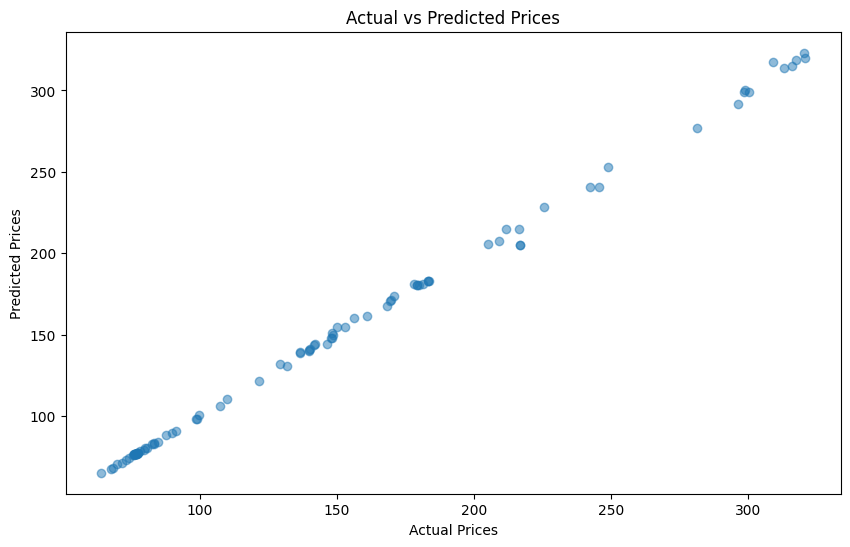

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()


In [29]:
coefficients = pd.DataFrame({'Feature': merged.columns[2:], 'Coefficient': model.coef_})
print(coefficients.sort_values(by='Coefficient', ascending=False))


                        Feature  Coefficient
5                     inflation    75.981138
1                      Mortgage    19.044507
2                 housing_units    13.554887
6             unemployment_rate     7.729758
4                        income     5.154128
0  Federal_Funds_Effective_Rate     3.367309
3             population_growth    -5.219307


In [30]:
# Convert 'observation_date' to datetime format
merged['observation_date'] = merged['observation_date'].dt.to_timestamp()

# Set it as the index for easier plotting
merged.set_index('observation_date', inplace=True)

# **Correlation Matrix**

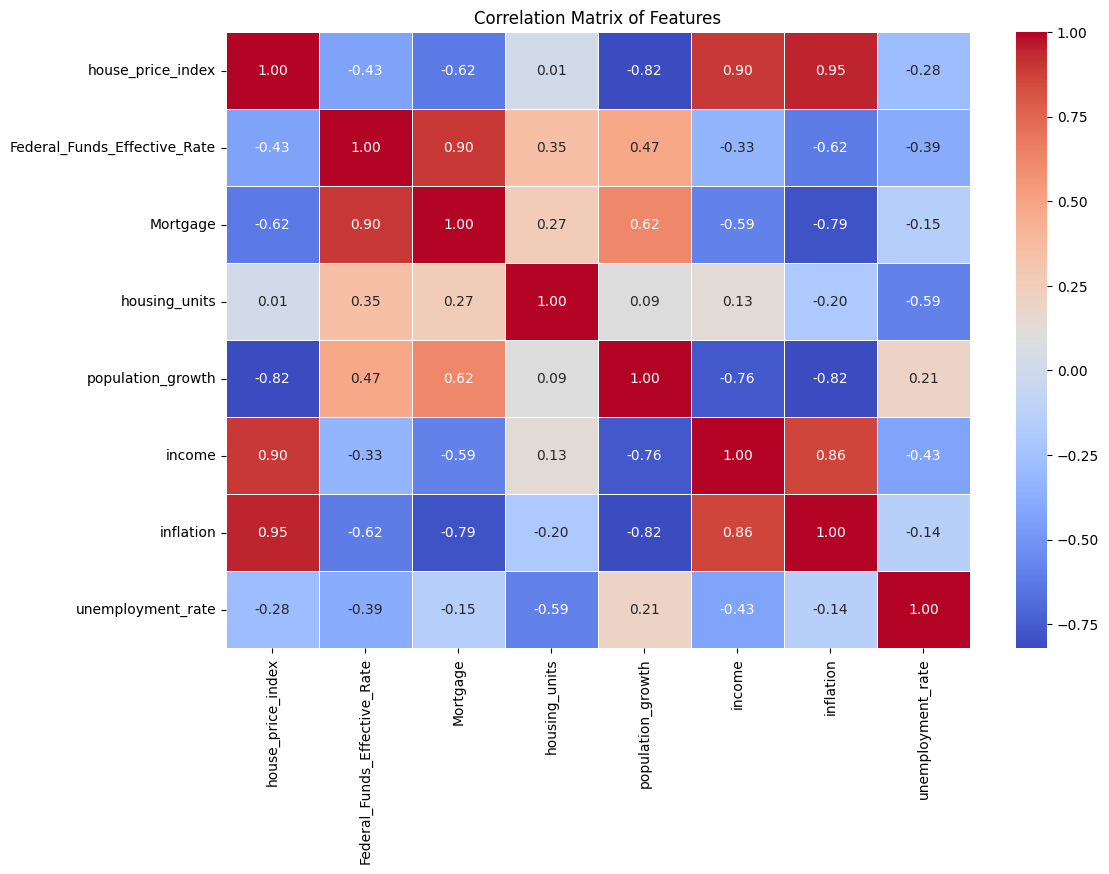

In [31]:
# Compute the correlation matrix
correlation_matrix = merged.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()


In [32]:
# Create the heatmap
fig = px.imshow(correlation_matrix,
                color_continuous_scale='Viridis', # You can choose other color scales as well
                title="Correlation Matrix of Home Price Factors",
                labels={'x': 'Features', 'y': 'Features'},template='plotly_dark')

# Show the plot
fig.show()


In [33]:
correlation_matrix

,house_price_index,Federal_Funds_Effective_Rate,Mortgage,housing_units,population_growth,income,inflation,unemployment_rate
house_price_index,1.000000,-0.433512,-0.622074,0.007313,-0.819632,0.896775,0.946382,-0.280605
Federal_Funds_Effective_Rate,-0.433512,1.000000,0.896335,0.352257,0.473733,-0.330783,-0.621051,-0.385416
Mortgage,-0.622074,0.896335,1.000000,0.266483,0.620817,-0.592339,-0.790934,-0.147785
housing_units,0.007313,0.352257,0.266483,1.000000,0.090148,0.130467,-0.198825,-0.592999
population_growth,-0.819632,0.473733,0.620817,0.090148,1.000000,-0.764358,-0.820639,0.208575
income,0.896775,-0.330783,-0.592339,0.130467,-0.764358,1.000000,0.858317,-0.425745
inflation,0.946382,-0.621051,-0.790934,-0.198825,-0.820639,0.858317,1.000000,-0.141846
unemployment_rate,-0.280605,-0.385416,-0.147785,-0.592999,0.208575,-0.425745,-0.141846,1.000000


# House Price Index Correlations:

### **Federal Funds Effective Rate (-0.43):** A negative correlation, meaning as the federal rate increases, home prices tend to decrease, though the correlation is moderate.
### **Mortgage (-0.62):** A stronger negative correlation, implying that as mortgage rates rise, home prices tend to fall.
Population Growth (-0.82): A strong negative correlation, suggesting that when population growth slows, home prices may decrease.
### **Income (0.90):** A strong positive correlation, indicating that as income increases, home prices tend to rise.
### **Inflation (0.95):** Very strong positive correlation, meaning higher inflation is strongly associated with higher home prices.

## Federal Funds Effective Rate:

### **Mortgage (0.90):** A strong positive correlation, meaning as federal funds rates increase, mortgage rates tend to increase as well.
### **Inflation (-0.62):** Negative correlation, suggesting that as federal funds rates increase, inflation might decrease or is negatively impacted.
## Mortgage Correlations:

### **Housing Units (0.27):** A positive but weak correlation, indicating that as mortgage rates increase, the number of housing units might increase slightly.
### **Income (-0.59):** A negative correlation, suggesting that higher mortgage rates might lead to reduced disposable income for homebuyers.
## Population Growth:

### **Income (-0.76):** Negative correlation, meaning that when population growth decreases, income tends to decrease as well.
## Inflation:

### **Income (0.86):** Positive correlation, implying that inflation and income tend to rise or fall together.
## Unemployment Rate:

### **Housing Units (-0.59):** A moderate negative correlation, suggesting that as unemployment increases, fewer housing units are being built.

# **Interpretation:**
## **Stronger Positive Relationships:** Income and inflation are strongly positively correlated with house prices, showing that rising income and inflation can lead to increased home prices.

## **Stronger Negative Relationships:** The federal funds rate, mortgage rates, and population growth have a relatively stronger negative correlation with house prices. Higher federal funds and mortgage rates tend to drive home prices down.

# **scatter plots**

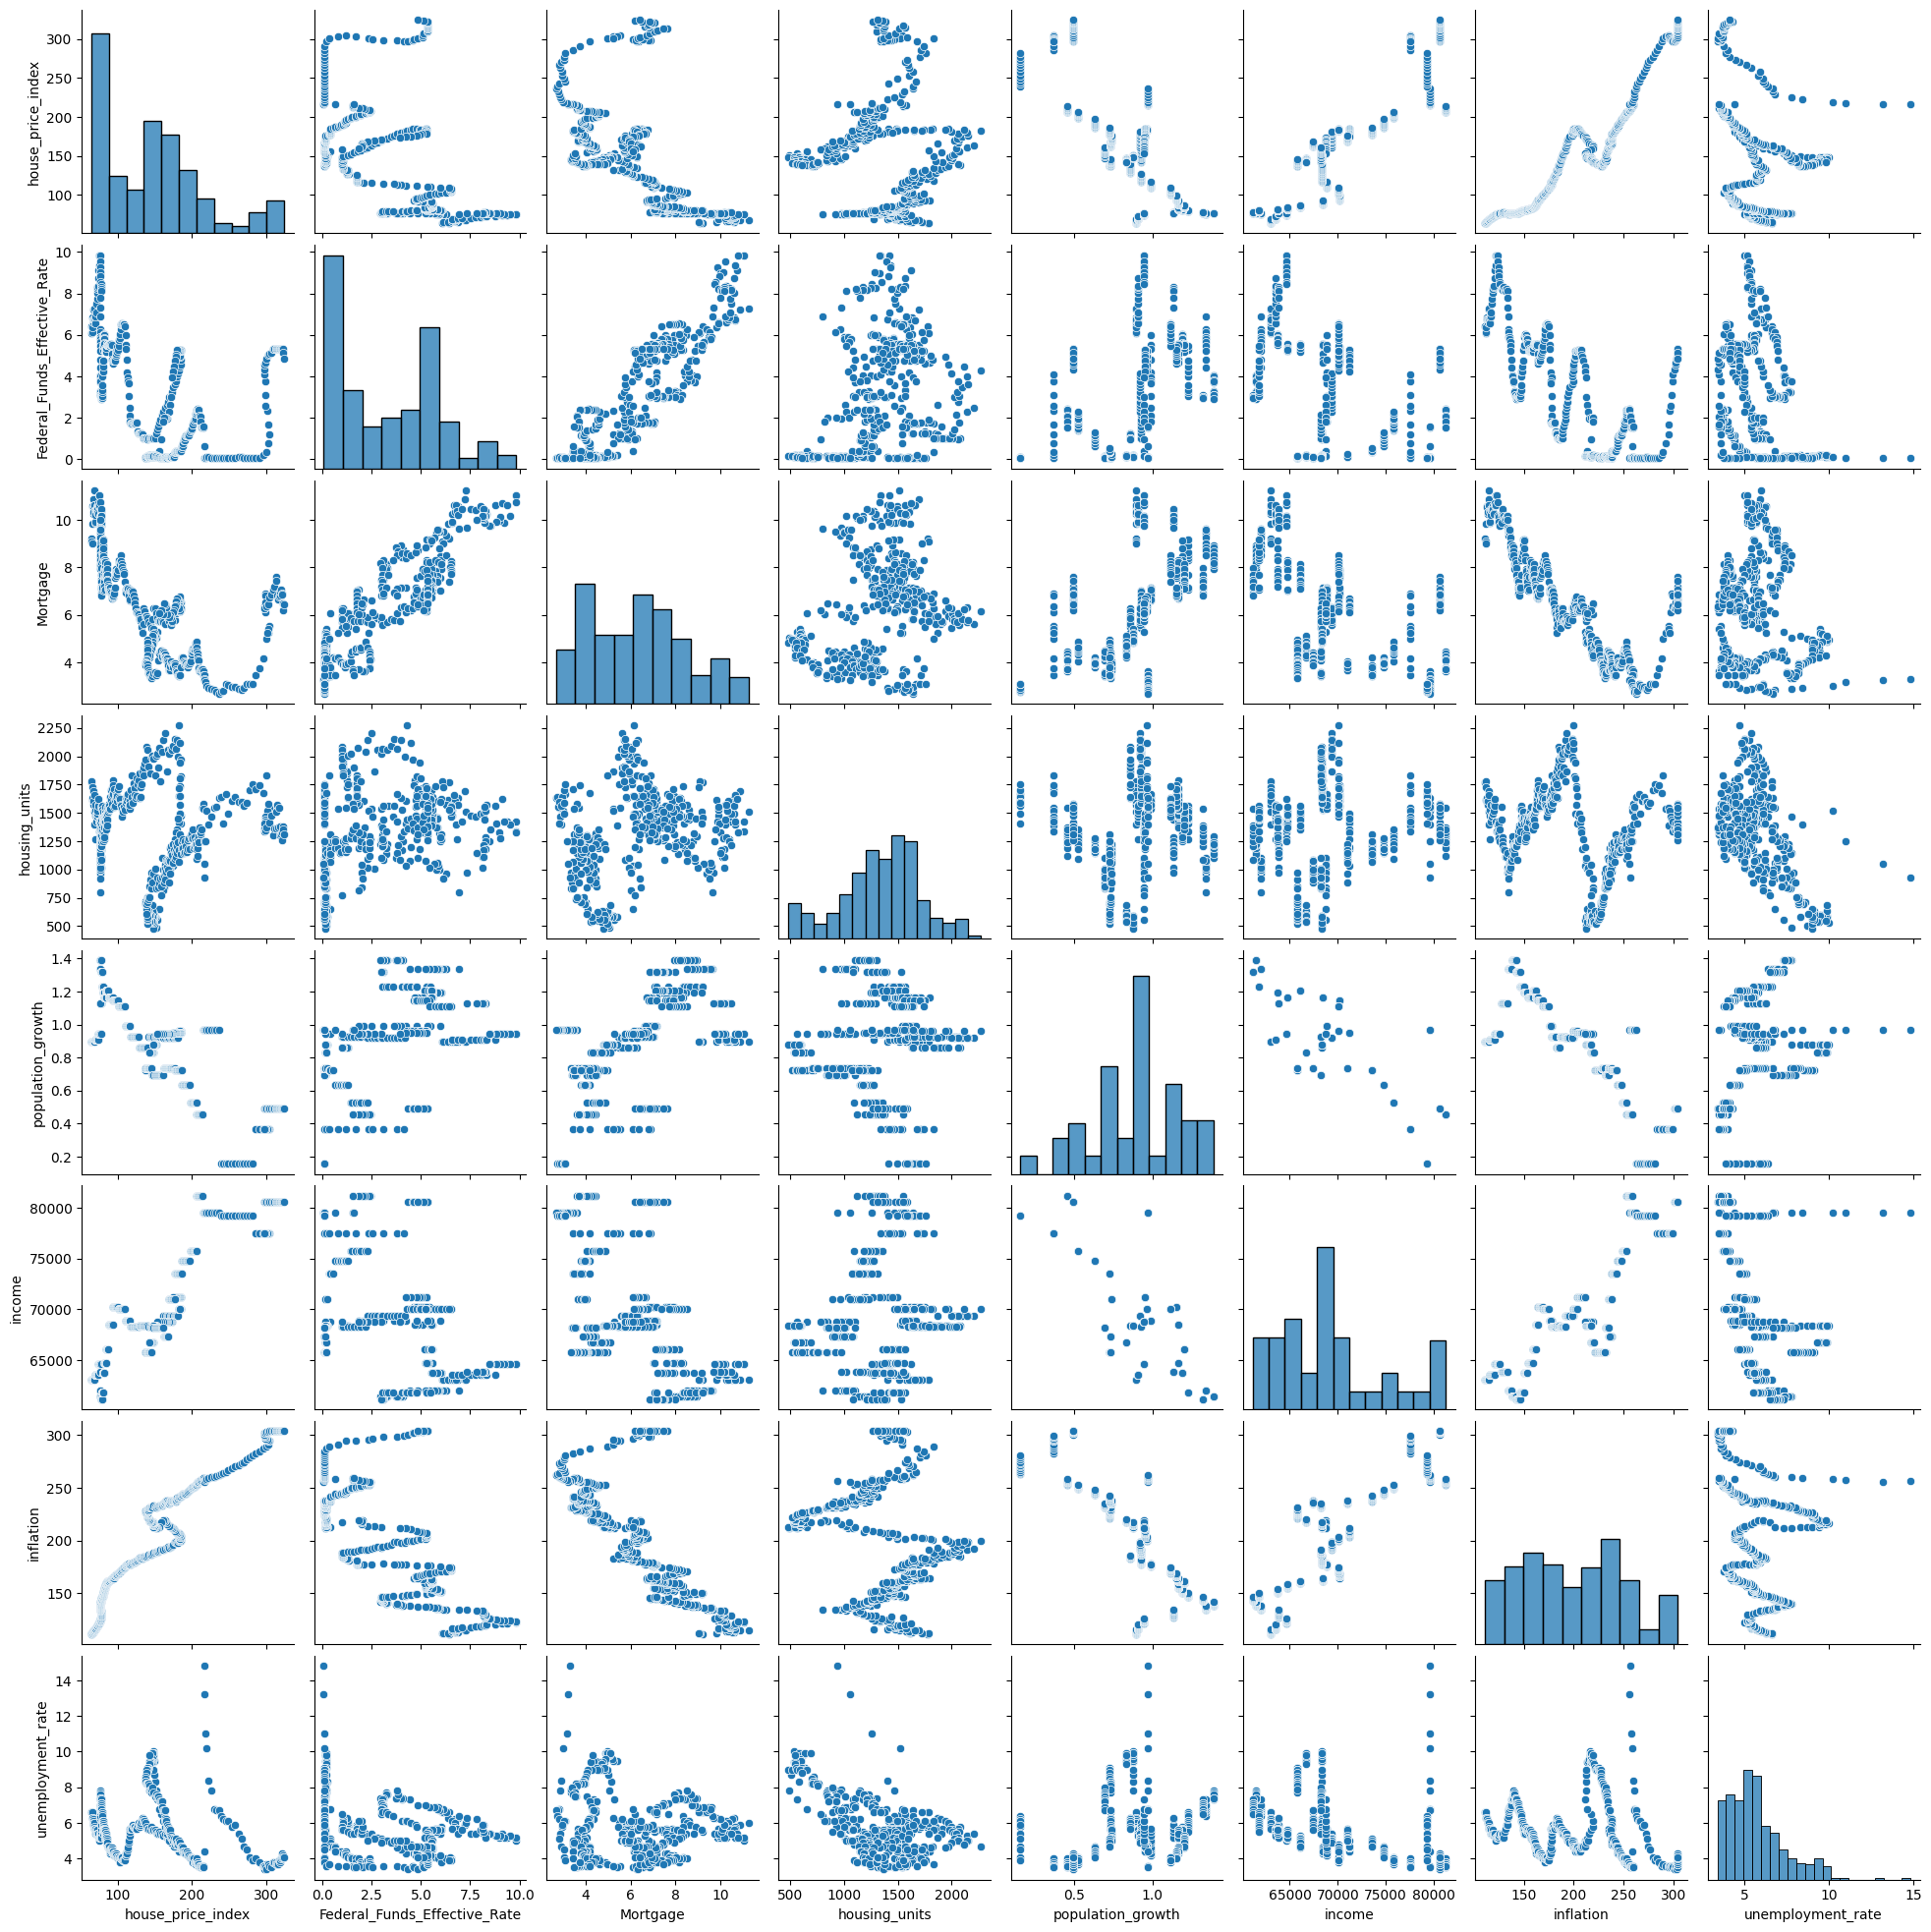

In [34]:
sns.pairplot(merged[['house_price_index', 'Federal_Funds_Effective_Rate', 'Mortgage',
                     'housing_units', 'population_growth', 'income', 'inflation', 'unemployment_rate']])
plt.show()


In [35]:
# Plotting house_price_index against other features
features = ['Federal_Funds_Effective_Rate', 'Mortgage', 'housing_units', 'population_growth', 'income', 'inflation', 'unemployment_rate']

# Create a scatter plot for each feature against house_price_index
for feature in features:
    fig = px.scatter(merged, x=feature, y='house_price_index', title=f'House Price Index vs {feature}',
                     labels={'x': feature, 'y': 'House Price Index'},
                     template='plotly_dark')
    fig.show()
